### BOUNDING BOX
-> Compute (x, y, z) means

-> Get the covariance matrix, which expresses the degree of variance around each mean with respect to a point set

-> Compute the eigenvector, eigenvalue of the covariance matrix

-> Eigenvectors represent the principal direction of data spread. The eigenvector associated with the largest eigenvalue points in the direction of greatest variance in the data set

-> Center the dataset around the centroid

-> Rotate the points in the dataset to align with the eigenvector

-> Compute the absolute value of the max and mins to draw the oriented bounding box

-> Unrotate the bounding box back to the regular coordinate system

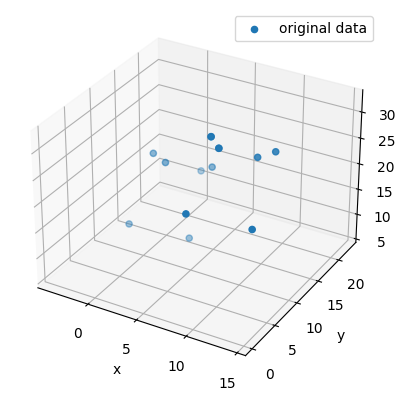

In [26]:
# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
from mpl_toolkits.mplot3d import Axes3D


# generate random points, add noise to dataset
# y = np.linspace(1, 10, 5) + np.random.normal(0, 0.2, 5)
# z = np.linspace(1, 10, 5) + np.random.normal(0, 0.2, 5)
# x = np.linspace(1, 10, 5) + np.random.normal(0, 0.2, 5)
# data = np.vstack([x, y, z])

mesh = np.array([
    [2.9332705452110419, 14.005997384948117, 6.1899642452550392], 
    [1.2796522506551051, 22.683917742744043, 12.887540879848547], 
    [-3.9500367363111302, 20.248855069408705, 14.751404668622987], 
    [-2.2964184417551925, 11.570934711612779, 8.053828034029479], 
    [9.2360317618136420, 0.22996972574907204, 25.595435689360876], 
    [7.5824134672577008, 8.9078900835449986, 32.293012323954386],
    [12.812102454223936, 11.342952756880337, 30.429148535179941],
    [-2.2121896654934430, 19.410762544741115, 14.427265355518752], 
    [0.93512546588596646, 20.876224375596824, 13.305560657617981], 
    [-3.9500367363111302, 20.248855069408705, 14.751404668622987], 
    [-2.2121896654934430, 19.410762544741115, 14.427265355518752],
    [8.2569381821712469, 9.1154644721638078, 30.351490472953653], 
    [11.404253313550655, 10.580926303019524, 29.229785775052882], 
    [1.2796522506551051, 22.683917742744043, 12.887540879848547], 
    [7.5824134672577008, 8.9078900835449986, 32.293012323954386], 
    [8.2569381821712469, 9.1154644721638078, 30.351490472953653],
    [14.465720748779876, 2.6650323990844091, 23.731571900586438]
    ])
data = mesh.T  # transpose for means
# plot pointset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0,:], data[1,:], data[2,:], label="original data")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

In [27]:
means = np.mean(data, axis=1)
# Covariance represents the degree of clustering around the mean in each axis
covariance_matrix = np.cov(data)
# eignevalues are scalars representing the magnitude of variance
# eigenvectors point in the principal direction of variance in data in each direction
eigenvalues, eigenvectors = LA.eig(covariance_matrix)


print('We can see that the the eigenvectors are orthogonal:')
print(np.rad2deg(np.arccos(np.dot(eigenvectors[:,0], eigenvectors[:,1]))))
print(np.rad2deg(np.arccos(np.dot(eigenvectors[:,2], eigenvectors[:,0]))))
print(np.rad2deg(np.arccos(np.dot(eigenvectors[:,1], eigenvectors[:,2]))))

print('\nThe eigenvectors are contained in a 3x3 matrix: matrix contains vectors that point in the principal direction of variance:')
print(eigenvectors)

print('\nWhere each column contains a vector that points in the principal direction of variance:')
print(f'u: {eigenvectors[:,0]}')  
print(f'v: {eigenvectors[:,1]}') 
print(f'w: {eigenvectors[:,2]}') 

We can see that the the eigenvectors are orthogonal:
90.00000000000003
90.0
90.0

The eigenvectors are contained in a 3x3 matrix: matrix contains vectors that point in the principal direction of variance:
[[ 0.4698271  -0.85960236 -0.20086384]
 [-0.49763366 -0.44584643  0.74403071]
 [ 0.72912498  0.24960918  0.6372378 ]]

Where each column contains a vector that points in the principal direction of variance:
u: [ 0.4698271  -0.49763366  0.72912498]
v: [-0.85960236 -0.44584643  0.24960918]
w: [-0.20086384  0.74403071  0.6372378 ]


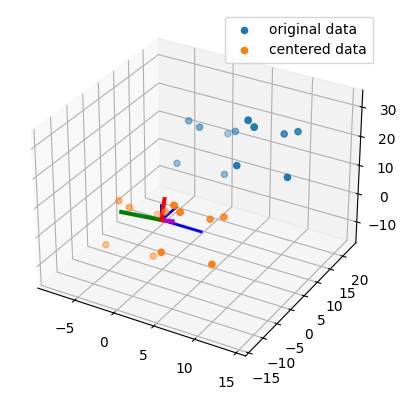

In [28]:
# The eigenvectors are at the cartesian origin, meaning we need to move the point cloud to be centered around the origin to be useful
# We do this by subtracting the means from each value. This aligns the centroid of the dataset to the cartesian origin
centered_data = data - means[:,np.newaxis]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0,:], data[1,:], data[2,:], label="original data")
ax.scatter(centered_data[0,:], centered_data[1,:], centered_data[2,:], label="centered data")
ax.legend()

# cartesian basis
origin_scale=5
ax.plot([0, origin_scale],  [0, 0], [0, 0], color='b', linewidth=2)
ax.plot([0, 0],  [0, origin_scale], [0, 0], color='b', linewidth=2)
ax.plot([0, 0],  [0, 0], [0, origin_scale], color='b', linewidth=2)

# eigen basis
eigen_v_scaling=5
ax.plot([0, eigenvectors[0, 0]*eigen_v_scaling],  [0, eigenvectors[1, 0]*eigen_v_scaling], [0, eigenvectors[2, 0]*eigen_v_scaling], color='m', linewidth=3)
ax.plot([0, eigenvectors[0, 1]*eigen_v_scaling],  [0, eigenvectors[1, 1]*eigen_v_scaling], [0, eigenvectors[2, 1]*eigen_v_scaling], color='g', linewidth=3)
ax.plot([0, eigenvectors[0, 2]*eigen_v_scaling],  [0, eigenvectors[1, 2]*eigen_v_scaling], [0, eigenvectors[2, 2]*eigen_v_scaling], color='r', linewidth=3)

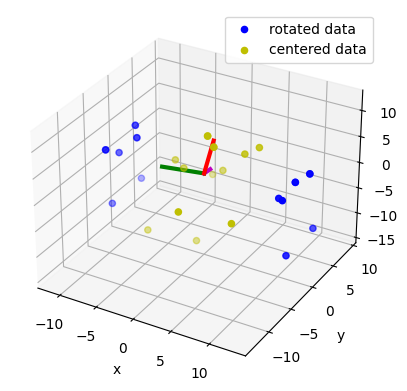

In [29]:
# Now, we need to rotate the dataset to align with the eigenvector basis
rotated_coordinates = np.matmul(eigenvectors.T, centered_data)

# plot the points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rotated_coordinates[0,:], rotated_coordinates[1,:], rotated_coordinates[2,:], color='b', label="rotated data")
ax.scatter(centered_data[0,:], centered_data[1,:], centered_data[2,:], color='y', label="centered data")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# eigen basis
eigen_v_scaling=5
ax.plot([0, eigenvectors[0, 0]*eigen_v_scaling],  [0, eigenvectors[1, 0]*eigen_v_scaling], [0, eigenvectors[2, 0]*eigen_v_scaling], color='m', linewidth=3)
ax.plot([0, eigenvectors[0, 1]*eigen_v_scaling],  [0, eigenvectors[1, 1]*eigen_v_scaling], [0, eigenvectors[2, 1]*eigen_v_scaling], color='g', linewidth=3)
ax.plot([0, eigenvectors[0, 2]*eigen_v_scaling],  [0, eigenvectors[1, 2]*eigen_v_scaling], [0, eigenvectors[2, 2]*eigen_v_scaling], color='r', linewidth=3)

In [35]:
def draw3DRectangle(ax, x1, y1, z1, x2, y2, z2):
    # the Translate the datatwo sets of coordinates form the apposite diagonal points of a cuboid
    ax.plot([x1, x2], [y1, y1], [z1, z1], color='b') # | (up)
    ax.plot([x2, x2], [y1, y2], [z1, z1], color='b') # -->
    ax.plot([x2, x1], [y2, y2], [z1, z1], color='b') # | (down)
    ax.plot([x1, x1], [y2, y1], [z1, z1], color='b') # <--

    ax.plot([x1, x2], [y1, y1], [z2, z2], color='b') # | (up)
    ax.plot([x2, x2], [y1, y2], [z2, z2], color='b') # -->
    ax.plot([x2, x1], [y2, y2], [z2, z2], color='b') # | (down)
    ax.plot([x1, x1], [y2, y1], [z2, z2], color='b') # <--
    
    ax.plot([x1, x1], [y1, y1], [z1, z2], color='b') # | (up)
    ax.plot([x2, x2], [y2, y2], [z1, z2], color='b') # -->
    ax.plot([x1, x1], [y2, y2], [z1, z2], color='b') # | (down)
    ax.plot([x2, x2], [y1, y1], [z1, z2], color='b') # <--

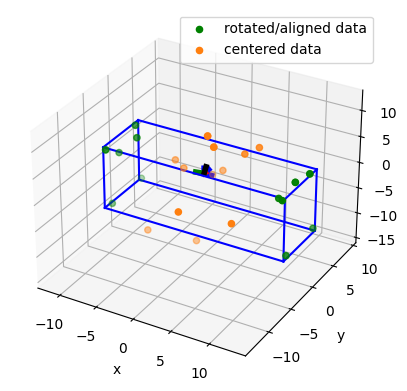

In [36]:
# now that our rotated point set aligns with the coordinate system, we can draw a simple max min bounding box
xmin, xmax, ymin, ymax, zmin, zmax = np.min(rotated_coordinates[0, :]), np.max(rotated_coordinates[0, :]), np.min(rotated_coordinates[1, :]), np.max(rotated_coordinates[1, :]), np.min(rotated_coordinates[2, :]), np.max(rotated_coordinates[2, :])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rotated_coordinates[0,:], rotated_coordinates[1,:], rotated_coordinates[2,:], color='g', label="rotated/aligned data")
ax.scatter(centered_data[0,:], centered_data[1,:], centered_data[2,:], color='tab:orange', label="centered data")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# cartesian basis
ax.plot([0, 1],  [0, 0], [0, 0], color='b', linewidth=4)
ax.plot([0, 0],  [0, 1], [0, 0], color='b', linewidth=4)
ax.plot([0, 0],  [0, 0], [0, 1], color='b', linewidth=4)
# eigen basis
ax.plot([0, eigenvectors[0, 0]],  [0, eigenvectors[1, 0]], [0, eigenvectors[2, 0]], color='r', linewidth=4)
ax.plot([0, eigenvectors[0, 1]],  [0, eigenvectors[1, 1]], [0, eigenvectors[2, 1]], color='g', linewidth=4)
ax.plot([0, eigenvectors[0, 2]],  [0, eigenvectors[1, 2]], [0, eigenvectors[2, 2]], color='k', linewidth=4)

draw3DRectangle(ax, xmin, ymin, zmin, xmax, ymax, zmax)

In [37]:
rectangle_coordinates = lambda x1, y1, z1, x2, y2, z2: np.array([[x1, x1, x2, x2, x1, x1, x2, x2],
                                                      [y1, y2, y2, y1, y1, y2, y2, y1],
                                                      [z1, z1, z1, z1, z2, z2, z2, z2]])
# undo the rotations on coordinate points
realigned_coords = np.matmul(eigenvectors, rotated_coordinates)
# undo the movement of coordinate points to be centered on the origin
realigned_coords += means[:, np.newaxis]

# un-align the bounding box from the rotated points
rrc = np.matmul(eigenvectors, rectangle_coordinates(xmin, ymin, zmin, xmax, ymax, zmax))
# move box from being centered about the cartesian origin
rrc += means[:, np.newaxis] 


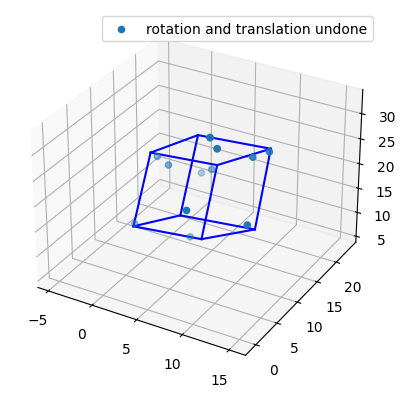

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(realigned_coords[0,:], realigned_coords[1,:], realigned_coords[2,:], label="rotation and translation undone")
ax.legend()

# z1 plane boundary
ax.plot(rrc[0, 0:2], rrc[1, 0:2], rrc[2, 0:2], color='b')
ax.plot(rrc[0, 1:3], rrc[1, 1:3], rrc[2, 1:3], color='b')
ax.plot(rrc[0, 2:4], rrc[1, 2:4], rrc[2, 2:4], color='b')
ax.plot(rrc[0, [3,0]], rrc[1, [3,0]], rrc[2, [3,0]], color='b')

# z2 plane boundary
ax.plot(rrc[0, 4:6], rrc[1, 4:6], rrc[2, 4:6], color='b')
ax.plot(rrc[0, 5:7], rrc[1, 5:7], rrc[2, 5:7], color='b')
ax.plot(rrc[0, 6:], rrc[1, 6:], rrc[2, 6:], color='b')
ax.plot(rrc[0, [7, 4]], rrc[1, [7, 4]], rrc[2, [7, 4]], color='b')

# z1 and z2 connecting boundaries
ax.plot(rrc[0, [0, 4]], rrc[1, [0, 4]], rrc[2, [0, 4]], color='b')
ax.plot(rrc[0, [1, 5]], rrc[1, [1, 5]], rrc[2, [1, 5]], color='b')
ax.plot(rrc[0, [2, 6]], rrc[1, [2, 6]], rrc[2, [2, 6]], color='b')
ax.plot(rrc[0, [3, 7]], rrc[1, [3, 7]], rrc[2, [3, 7]], color='b')

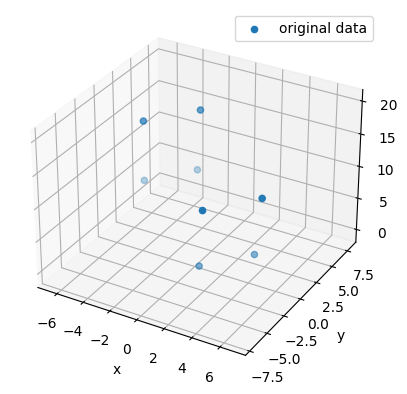

In [6]:
# TEST CASE Bounding box points
bb_points = np.array([[4.1949637777057571, -6.9916062961762613, 16.047420986034020], 
             [6.8206194998754439, -4.0247156045330703, 16.598321750671875], 
             [-0.48443183668373879, 1.7688355092261352, 20.213704228708519], 
             [-3.1100875588534249, -1.1980551824170558, 19.662803464070663], 
             [3.4299717028501773, 2.0579830217101063, -6.6613381477509392e-16], 
             [-3.8750796337090048, 7.8515341354693104, 3.6153824780366430], 
             [-6.5007353558786898, 4.8846434438261213, 3.0644817133987878], 
             [0.80431598068049104, -0.90890766993308547, -0.55090076463785609]])

# plot pointset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bb_points[:,0], bb_points[:,1], bb_points[:,2], label="original data")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()